<a href="https://colab.research.google.com/github/AakashAhuja30/Deep-Learning/blob/master/TensorflowDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt
plt.style.use('default')

In [30]:
tf.compat.v1.disable_eager_execution()

In [4]:
Nlist=[5,1000,3000]
T=10 #Repeat experiments 10 times
timeDiffNP= np.zeros((T,len(Nlist)),dtype=np.float32)
timeDiffTF=np.zeros((T,len(Nlist)), dtype=np.float32)

sess = tf.compat.v1.Session()

for N in range(len(Nlist)):
  A=np.random.rand(Nlist[N],Nlist[N])
  Atf=tf.constant(A)
  Btf=Atf@Atf@Atf@Atf@Atf
  for i in range(T):
    tickNP=time.time()
    B=A@A@A@A@A
    tocNP=time.time()
    
    ticTF=time.time()
    sess.run(Btf)
    tocTF=time.time()

    timeDiffNP[i,N]=tocNP-tickNP
    timeDiffTF[i,N]=tocTF-ticTF

  print('CPU(numpy): {0}X{0}:{1:f}'.format(Nlist[N],np.mean(timeDiffNP[N,:])))
  print('GPU(TF): {0}X{0}:{1:f}'.format(Nlist[N],np.mean(timeDiffTF[N,:])))

sess.close()



CPU(numpy): 5X5:0.001518
GPU(TF): 5X5:0.039038
CPU(numpy): 1000X1000:0.082816
GPU(TF): 1000X1000:0.001149
CPU(numpy): 3000X3000:2.228309
GPU(TF): 3000X3000:0.009513


In [5]:
y=np.array([[1,1,1,1,0,0,0,0,0,0,0,0],[0,0,0,0,1,1,1,1,0,0,0,0],[0,0,0,0,0,0,0,0,1,1,1,1]])

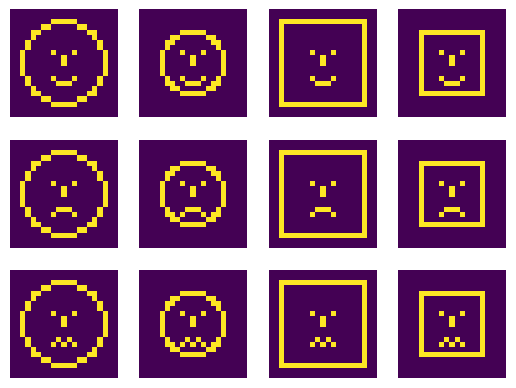

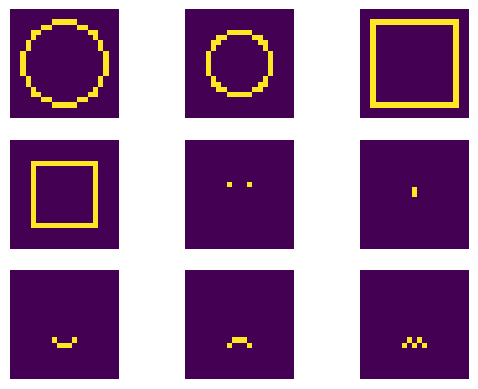

In [6]:
r=8
w1=np.zeros((21,21))
x1=np.array([np.arange(21)]).T
x2=np.array([np.arange(21)])
X1, X2=np.meshgrid(x1,x2)
R=(X1-10)**2+(X2-10)**2
x1c, x2c=np.where(np.all([[R<(r+.5)**2],[R>(r-.5)**2]], axis=0).squeeze())
w1[x1c, x2c]=1
# plt.figure()
# plt.imshow(w1)
# plt.close()
r=6
w2=np.zeros((21,21))
R=(X1-10)**2+(X2-10)**2
x1c, x2c=np.where(np.all([[R<(r+.5)**2],[R>(r-.5)**2]], axis=0).squeeze())
w2[x1c, x2c]=1
# plt.figure()
# plt.imshow(w2)
# plt.close()
r=8
w3=np.zeros((21,21))
w3[2*np.ones((1,17),dtype=np.int8), 2:19]=1
w3[18*np.ones((1,17),dtype=np.int8), 2:19]=1
w3[2:19 ,2*np.ones((1,17),dtype=np.int8)]=1
w3[2:19 ,18*np.ones((1,17),dtype=np.int8)]=1
# plt.imshow(w3)
r=6
w4=np.zeros((21,21))
w4[4*np.ones((1,13),dtype=np.int8), 4:17]=1
w4[16*np.ones((1,13),dtype=np.int8), 4:17]=1
w4[4:17, 4*np.ones((1,13),dtype=np.int8)]=1
w4[4:17, 16*np.ones((1,13),dtype=np.int8)]=1
# plt.imshow(w4)
w5=np.zeros((21,21))
w5[[8,8], [8,12]]=1;
# plt.imshow(w5)
w6=np.zeros((21,21))
w6[9:11, [10,10]]=1;
# plt.imshow(w6)
w7=np.zeros((21,21))
w7[[13,14,14,14,13], [8,9,10,11,12]]=1;
# plt.imshow(w7)
w8=np.zeros((21,21))
w8[[14,13,13,13,14], [8,9,10,11,12]]=1;
# plt.imshow(w7)
w9=np.zeros((21,21))
w9[[14,13,14,13,14], [8,9,10,11,12]]=1;



# plt.imshow(w1+w5+w6+w8)
# w1, w2, w3, w4
# w5, w6
# w7
# w8
X=np.zeros((12,21*21))
X[0,:]=(w1+w5+w6+w7).reshape((1,21*21))
X[1,:]=(w2+w5+w6+w7).reshape((1,21*21))
X[2,:]=(w3+w5+w6+w7).reshape((1,21*21))
X[3,:]=(w4+w5+w6+w7).reshape((1,21*21))
X[4,:]=(w1+w5+w6+w8).reshape((1,21*21))
X[5,:]=(w2+w5+w6+w8).reshape((1,21*21))
X[6,:]=(w3+w5+w6+w8).reshape((1,21*21))
X[7,:]=(w4+w5+w6+w8).reshape((1,21*21))
X[8,:]=(w1+w5+w6+w9).reshape((1,21*21))
X[9,:]=(w2+w5+w6+w9).reshape((1,21*21))
X[10,:]=(w3+w5+w6+w9).reshape((1,21*21))
X[11,:]=(w4+w5+w6+w9).reshape((1,21*21))
X=X.T


W=np.zeros((9,21*21))
W[0,:]=w1.reshape((1,21*21))
W[1,:]=w2.reshape((1,21*21))
W[2,:]=w3.reshape((1,21*21))
W[3,:]=w4.reshape((1,21*21))
W[4,:]=w5.reshape((1,21*21))
W[5,:]=w6.reshape((1,21*21))
W[6,:]=w7.reshape((1,21*21))
W[7,:]=w8.reshape((1,21*21))
W[8,:]=w9.reshape((1,21*21))
W=W.T

# 
# %matplotlib inline
plt.figure()
for i in range(3):
  for j in range(4):
    ax=plt.subplot2grid((3, 4), (i, j))
    ax.imshow(X[:,i*4+j].reshape((21,21)))
    plt.axis('off')

plt.figure()
for i in range(3):
  for j in range(3):
    ax=plt.subplot2grid((3, 3), (i, j))
    ax.imshow(W[:,i*3+j].reshape((21,21)))
    plt.axis('off')



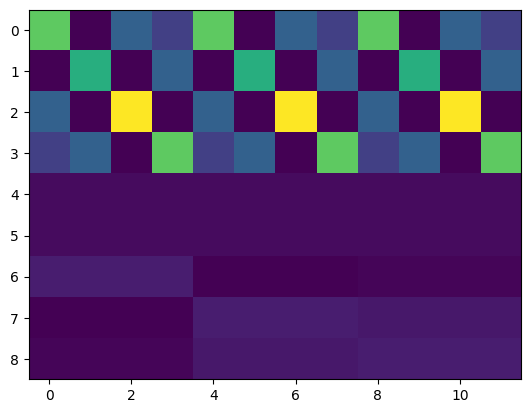

In [7]:
H=W.T@X
plt.figure()
plt.imshow(H)

In [8]:
W2=np.linalg.pinv(H@H.T)@H@y.T

In [13]:
W2=(np.random.rand(3,9) -0.5) * 0.01
y=np.array([[1,1,1,1,0,0,0,0,0,0,0,0],[0,0,0,0,1,1,1,1,0,0,0,0],[0,0,0,0,0,0,0,0,1,1,1,1]])


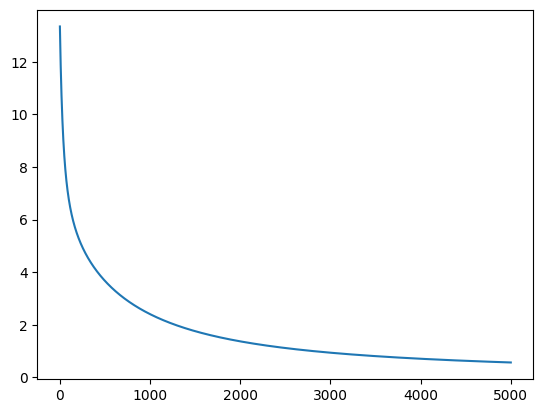

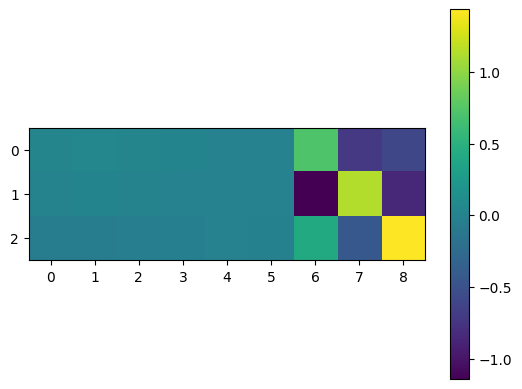

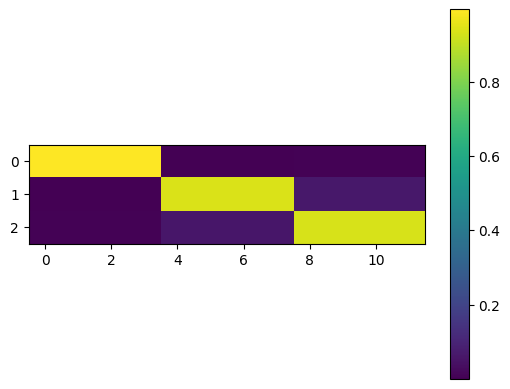

In [14]:
def softmax(x):
  return np.exp(x)/np.sum(np.exp(x), axis=0, keepdims=True)

N=5000
error=np.zeros(N)
lr=0.0003

for i in range(N):
  z=W2@H
  yh=softmax(z)
  error[i]=np.sum(-y*np.log(yh))
  dw2= - (yh-y)@H.T
  W2+= dw2 * lr

plt.figure()
plt.plot(error)
plt.show()

plt.figure()
plt.imshow(W2)
plt.colorbar()

plt.figure()
plt.imshow(yh)
plt.colorbar()


In [44]:
LOG_DIR = '/tmp/log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)


! wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
! unzip ngrok-stable-linux-amd64.zip

get_ipython().system_raw('./ngrok http 6006 &')

! curl -s http://localhost:4040/api/tunnels | python3 -c "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

#%load_ext tensorboard
#%tensorboard --logdir logs

--2020-10-01 22:33:23--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.71.209.190, 52.72.152.212, 34.198.20.103, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.71.209.190|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip.4’

ngrok-stable-linux- 100%[===================>]  13.13M  17.2MB/s    in 0.8s    

2020-10-01 22:33:24 (17.2 MB/s) - ‘ngrok-stable-linux-amd64.zip.4’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ngrok                   
http://d5030e5be517.ngrok.io


In [45]:
import tensorflow as tf
import tensorflow.compat.v1 as tfc

In [46]:
y=np.array([[1,1,1,1,0,0,0,0,0,0,0,0],[0,0,0,0,1,1,1,1,0,0,0,0],[0,0,0,0,0,0,0,0,1,1,1,1]])
lr=0.0003

In [47]:
sess=tfc.InteractiveSession()

with tfc.name_scope('lastlayer'):
  lr=tfc.constant(0.0003,dtype=tfc.float32,name='learningRate')
  y=tfc.constant(np.array([[1,1,1,1,0,0,0,0,0,0,0,0],[0,0,0,0,1,1,1,1,0,0,0,0],[0,0,0,0,0,0,0,0,1,1,1,1]]),dtype=tfc.float32,name="target")
  H=tfc.constant(W.T@X, dtype=tfc.float32,name='input')
  W2=tfc.Variable((tfc.random.uniform((3,9))-0.5)*0.001,name="Weights")
  with tfc.name_scope('output'):
    yh=W2@H
    err=tfc.reduce_sum(-y*tfc.log(tfc.exp(yh)/tfc.reduce_sum(tfc.exp(yh), 0, True)))
    dw2= tfc.gradients(err,W2)
    update=tfc.assign(W2,W2-lr*dw2[0])




/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1751: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


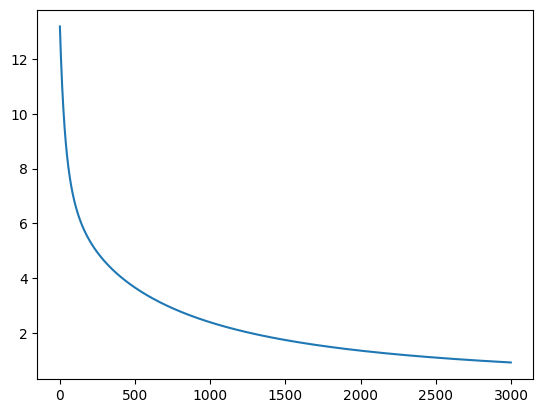

In [48]:
tfc.global_variables_initializer().run()
train_writer = tfc.summary.FileWriter(LOG_DIR, sess.graph)
maxIter=3000
errt=np.zeros(maxIter, dtype=np.float32)

for i in range(maxIter):
    errt[i], _=sess.run([err, update])
    
plt.figure()
plt.plot(errt)
plt.show()
sess.close()